## Importing libraries and loading data

In [2]:
# Data viz stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP stack
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Machine learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ivandominguez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ivandominguez/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_csv('cefr_leveled_texts.csv')

## EDA

In [4]:
df.head()


text label
0  Hi!\nI've been meaning to write for ages and f...    B2
1  ﻿It was not so much how hard people found the ...    B2
2  Keith recently came back from a trip to Chicag...    B2
3  The Griffith Observatory is a planetarium, and...    B2
4  -LRB- The Hollywood Reporter -RRB- It's offici...    B2

In [5]:
df['label'].value_counts()

A1    288
B2    286
A2    272
C1    241
B1    205
C2    202
Name: label, dtype: int64

In [6]:
df['text'].count()

1494

Text(0.0, 1.0, 'Distribution of texts by level')

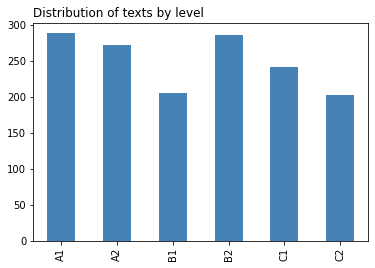

In [7]:

df['label'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title("Distribution of texts by level", loc='left')

In [8]:
# Frequency table

rel_freq = df['label'].value_counts()
rel_freq = pd.DataFrame(rel_freq)
rel_freq = rel_freq.reset_index()
rel_freq.rename(columns = {'index' : 'label', 'label' : 'Rel Freq'}, inplace = True)
rel_freq

label  Rel Freq
0    A1       288
1    B2       286
2    A2       272
3    C1       241
4    B1       205
5    C2       202

In [9]:
total = rel_freq['Rel Freq'].sum()
total


1494

In [10]:
percentage = []
 
for i in range(rel_freq.shape[0]):
    pct = (rel_freq['Rel Freq'][i] / total) * 100
    percentage.append(round(pct, 2))
 
# display percentage
print(percentage)
 
# display data
rel_freq['Percentage'] = percentage
display(rel_freq)

[19.28, 19.14, 18.21, 16.13, 13.72, 13.52]


label  Rel Freq  Percentage
0    A1       288       19.28
1    B2       286       19.14
2    A2       272       18.21
3    C1       241       16.13
4    B1       205       13.72
5    C2       202       13.52

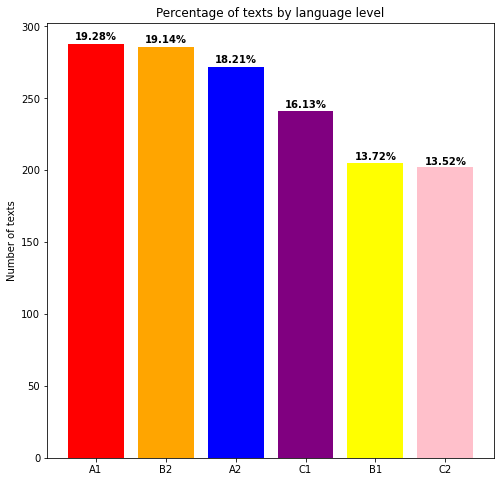

In [11]:
# depict illustration
plt.figure(figsize=(8, 8))
colors_list = ['Red', 'Orange', 'Blue', 'Purple', 'Yellow', 'Pink']
graph = plt.bar(rel_freq.label, rel_freq['Rel Freq'], color=colors_list)
plt.title('Percentage of texts by language level')
plt.ylabel('Number of texts')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(rel_freq.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

**This plot shows us that we have an unbalanced dataset, since the classes have different sizes. We will need to take care of that.**

In [1]:
#A1 = df[df['label'] == 'A1']
#A2 = df[df['label'] == 'A2']
#B1 = df[df['label'] == 'B2']
#B2 = df[df['label'] == 'B2']
#C1 = df[df['label'] == 'C1']
#C2 = df[df['label'] == 'C2']

#for i in A1['text']:
#    sentence = str(i)
#    print(sentence)
#    words = sentence.split()
#    print(words)
    
#grouped = df.groupby('label')




## Data cleaning

In [18]:
df.sort_values(by=['label'], ascending=False, inplace=True)

In [19]:
# Remove punctuation
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['text_wo_punct']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()


text label  \
1493  Without additional heating, radiative cooling ...    C2   
1355  Land threatens the overall economy of Ethiopia...    C2   
1365  ﻿Leading water scientists have issued one of t...    C2   
1364  Egalitarianism is a contested concept in socia...    C2   
1363  ﻿Nobody knows which came first: the economic c...    C2   

                                          text_wo_punct  
1493  Without additional heating radiative cooling o...  
1355  Land threatens the overall economy of Ethiopia...  
1365  ﻿Leading water scientists have issued one of t...  
1364  Egalitarianism is a contested concept in socia...  
1363  ﻿Nobody knows which came first the economic cr...

In [20]:
# Remove numbers
import re
def remove_numbers(text):
    no_numbers = [re.sub(r'\w*\d\w*', '', w) for w in text]
    words_wo_numbers=''.join(no_numbers)
    return words_wo_numbers
df['text_wo_numbers']=df['text_wo_punct'].apply(lambda x: remove_numbers(x))
df.head()



text label  \
1493  Without additional heating, radiative cooling ...    C2   
1355  Land threatens the overall economy of Ethiopia...    C2   
1365  ﻿Leading water scientists have issued one of t...    C2   
1364  Egalitarianism is a contested concept in socia...    C2   
1363  ﻿Nobody knows which came first: the economic c...    C2   

                                          text_wo_punct  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                        text_wo_numbers  
1493  Without additional heating radiative cooling o...  
1355  Land threatens the overall economy of Ethiopia...  
1365  ﻿Leading water scientists have issued one of t...  
1364  Egalitarianism is a contested concept in socia...  
1363  ﻿Nobody knows which came first the economic cr...

In [21]:
# Remove line breaks

def line_breaks(text):
    text = re.sub(r'\n', ' ', text)
    return text
df['no_linebreaks']=df['text_wo_numbers'].apply(lambda x: line_breaks(x))
df.head()
 

text label  \
1493  Without additional heating, radiative cooling ...    C2   
1355  Land threatens the overall economy of Ethiopia...    C2   
1365  ﻿Leading water scientists have issued one of t...    C2   
1364  Egalitarianism is a contested concept in socia...    C2   
1363  ﻿Nobody knows which came first: the economic c...    C2   

                                          text_wo_punct  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                        text_wo_numbers  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                          no_linebreaks  
1493  Without additional heating radiative cooling o...  
1355  Land threatens the overall economy of Ethiopia...  
1365  ﻿Leading water scientists have issued one of t...  
1364  Egalitarianism is a contested concept in socia...  
1363  ﻿Nobody knows which came first the economic cr...

In [22]:

# lower case everything

def lower_case(text):
    text = text.lower()
    return text
df['text_lower']=df['no_linebreaks'].apply(lambda x: lower_case(x))
df.head()


text label  \
1493  Without additional heating, radiative cooling ...    C2   
1355  Land threatens the overall economy of Ethiopia...    C2   
1365  ﻿Leading water scientists have issued one of t...    C2   
1364  Egalitarianism is a contested concept in socia...    C2   
1363  ﻿Nobody knows which came first: the economic c...    C2   

                                          text_wo_punct  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                        text_wo_numbers  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                          no_linebreaks  \
1493  Without additional heating radiative cooling o...   
1355  Land threatens the overall economy of Ethiopia...   
1365  ﻿Leading water scientists have issued one of t...   
1364  Egalitarianism is a contested concept in socia...   
1363  ﻿Nobody knows which came first the economic cr...   

                                             text_lower  
1493  without additional heating radiative cooling o...  
1355  land threatens the overall economy of ethiopia...  
1365  ﻿leading water scientists have issued one of t...  
1364  egalitarianism is a contested concept in socia...  
1363  ﻿nobody knows which came first the economic cr...

## Create a text corpus

In [23]:
# Convert the text series to a list

CORPUS = df['text_lower'].to_list()
CORPUS

['without additional heating radiative cooling of gas in the halos of massive galaxies milky way and above produces cold gas or stars in excess of that observed previous work suggested that agn jets are likely required but the form of jet energy required to quench remains unclear this is particularly challenging for galaxy simulations in which the resolution is orders of magnitude coarser than necessary to form and evolve the jet on such scales the uncertain parameters include jet energy form kinetic thermal and cosmic ray cr energy energy momentum and mass flux magnetic field strength and geometry jet precession angle and period openingangle and duty cycle we investigate all of these parameters in a m⊙ halo using highresolution noncosmological mhd simulations with the fire feedback in realistic environments stellar feedback model conduction and viscosity we explore which scenarios match observational constraints and show that crdominated jets can most efficiently quench the central ga

In [24]:
#CORPUS = [s.lower() for s in CORPUS]

In [25]:
# Remove numbers

### Preprocessing

In [26]:
#tokenize and lemmatize

CLEAN_CORPUS = []

tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()


for doc in CORPUS:
    tokens = tokenizer.tokenize(text=doc)
    clean_doc = " ".join(lemmatizer.lemmatize(token) for token in tokens)
    CLEAN_CORPUS.append(clean_doc)

In [27]:
CLEAN_CORPUS

['without additional heating radiative cooling of gas in the halo of massive galaxy milky way and above produce cold gas or star in excess of that observed previous work suggested that agn jet are likely required but the form of jet energy required to quench remains unclear this is particularly challenging for galaxy simulation in which the resolution is order of magnitude coarser than necessary to form and evolve the jet on such scale the uncertain parameter include jet energy form kinetic thermal and cosmic ray cr energy energy momentum and mass flux magnetic field strength and geometry jet precession angle and period openingangle and duty cycle we investigate all of these parameter in a m⊙ halo using highresolution noncosmological mhd simulation with the fire feedback in realistic environment stellar feedback model conduction and viscosity we explore which scenario match observational constraint and show that crdominated jet can most efficiently quench the central galaxy through a c

In [28]:
## Since the 

In [29]:
LABELS = ['C1-C2'] * 443 + ['B1-B2'] * 491 + ['A1-A2'] * 560
LABELS

['C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',
 'C1-C2',


### Vectorize text

In [30]:
vectorizer = CountVectorizer() # instanciation

In [31]:
vectors = vectorizer.fit_transform(CLEAN_CORPUS)

In [32]:
vectors

<1494x28176 sparse matrix of type '<class 'numpy.int64'>'
	with 282916 stored elements in Compressed Sparse Row format>

In [33]:
vectors.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [34]:
vectorizer.get_feature_names()

/Users/ivandominguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aagot',
 'aargh',
 'aaron',
 'ab',
 'aba',
 'ababa',
 'aback',
 'abajo',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abate',
 'abating',
 'abbey',
 'abbott',
 'abboud',
 'abbreviate',
 'abbreviated',
 'abc',
 'abcnewscom',
 'abdalla',
 'abdelaziz',
 'abdelwadood',
 'abdi',
 'abdomen',
 'abdu',
 'abducted',
 'abducting',
 'abduction',
 'abductor',
 'abdul',
 'abdulkadri',
 'abdullah',
 'abdulqawi',
 'abdurehim',
 'abdussalam',
 'abe',
 'abebaw',
 'abed',
 'abedine',
 'abel',
 'aberdeen',
 'aberdeenshire',
 'aberration',
 'abhay',
 'abhor',
 'abhorrent',
 'abhors',
 'abide',
 'abiding',
 'ability',
 'abject',
 'ablaze',
 'able',
 'ablest',
 'abner',
 'abnormal',
 'abnormality',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolition',
 'abolitionist',
 'aborted',
 'abortion',
 'about',
 'aboutcom',
 'above',
 'aboveaverage',
 'abraaj',
 'abraham',
 'abram',
 'abramovich',
 'abrams',
 'abrasion',
 'abreu',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absentee',


In [35]:
# let's put the vectorized texts in a pandas dataframe with the labels

import pandas as pd

pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names(), index=LABELS)

aagot  aargh  aaron  ab  aba  ababa  aback  abajo  abandon  abandoned  \
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
...      ...    ...    ...  ..  ...    ...    ...    ...      ...        ...   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   

       ...  ﬁnds  ﬁres  ﬁrewood  ﬁrm  ﬁrst  ﬁts  ﬁtted  ﬁve  ﬂoods  ﬂorid  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
...    ...   ...   ...      ...  ...   ...  ...    ...  ...    ...    ...  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  

[1494 rows x 28176 columns]

In [36]:

nltk.download('stopwords')

from nltk.corpus import stopwords

STOPWORDS = stopwords.words('english')

print(STOPWORDS)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivandominguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
vectorizer = CountVectorizer(stop_words=STOPWORDS)

vectors = vectorizer.fit_transform(CLEAN_CORPUS)

pd.DataFrame(vectors.todense(), columns=vectorizer.get_feature_names(), index=LABELS)

/Users/ivandominguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aagot  aargh  aaron  ab  aba  ababa  aback  abajo  abandon  abandoned  \
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
C1-C2      0      0      0   0    0      0      0      0        0          0   
...      ...    ...    ...  ..  ...    ...    ...    ...      ...        ...   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   
A1-A2      0      0      0   0    0      0      0      0        0          0   

       ...  ﬁnds  ﬁres  ﬁrewood  ﬁrm  ﬁrst  ﬁts  ﬁtted  ﬁve  ﬂoods  ﬂorid  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
C1-C2  ...     0     0        0    0     0    0      0    0      0      0  
...    ...   ...   ...      ...  ...   ...  ...    ...  ...    ...    ...  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  
A1-A2  ...     0     0        0    0     0    0      0    0      0      0  

[1494 rows x 28035 columns]

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer() 


vectors_normalized = tf.fit_transform(vectors)

In [39]:
vectors_normalized

<1494x28035 sparse matrix of type '<class 'numpy.float64'>'
	with 222322 stored elements in Compressed Sparse Row format>

In [40]:
text_df = pd.DataFrame(vectors_normalized.todense(), columns=vectorizer.get_feature_names(), index=LABELS)

/Users/ivandominguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
X = text_df
X

aagot  aargh  aaron   ab  aba  ababa  aback  abajo  abandon  abandoned  \
C1-C2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
C1-C2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
C1-C2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
C1-C2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
C1-C2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
...      ...    ...    ...  ...  ...    ...    ...    ...      ...        ...   
A1-A2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
A1-A2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
A1-A2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
A1-A2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   
A1-A2    0.0    0.0    0.0  0.0  0.0    0.0    0.0    0.0      0.0        0.0   

       ...  ﬁnds  ﬁres  ﬁrewood  ﬁrm  ﬁrst  ﬁts  ﬁtted  ﬁve  ﬂoods  ﬂorid  
C1-C2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
C1-C2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
C1-C2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
C1-C2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
C1-C2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
...    ...   ...   ...      ...  ...   ...  ...    ...  ...    ...    ...  
A1-A2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
A1-A2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
A1-A2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
A1-A2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  
A1-A2  ...   0.0   0.0      0.0  0.0   0.0  0.0    0.0  0.0    0.0    0.0  

[1494 rows x 28035 columns]

In [42]:
y = text_df.index
y

Index(['C1-C2', 'C1-C2', 'C1-C2', 'C1-C2', 'C1-C2', 'C1-C2', 'C1-C2', 'C1-C2',
       'C1-C2', 'C1-C2',
       ...
       'A1-A2', 'A1-A2', 'A1-A2', 'A1-A2', 'A1-A2', 'A1-A2', 'A1-A2', 'A1-A2',
       'A1-A2', 'A1-A2'],
      dtype='object', length=1494)

### Train-test split

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1120, 28035), (374, 28035), (1120,), (374,))

### Undersampling

In [135]:
rus = RandomUnderSampler(sampling_strategy={'A1-A2':332, 'B1-B2':332, 'C1-C2':332}, random_state=10) # reducing to 151 (not by)
nm = NearMiss(sampling_strategy={0:332})

In [136]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [137]:
X_train_rus.shape, y_train_rus.shape

((996, 28035), (996,))

### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression(multi_class='multinomial')

In [140]:
lr.fit(X_train_rus, y_train_rus)

LogisticRegression(multi_class='multinomial')

In [141]:
lr_rus_predictions = lr.predict(X_test)

In [142]:
lr.score(X_train_rus, y_train_rus)

0.9889558232931727

In [143]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred, average="weighted"), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred, average="weighted"), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred, average="weighted"), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(6, 6))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    
    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['A1-A2', 'B1-B2','C1-C2']); 
    ax.yaxis.set_ticklabels(['A1-A2', 'B1-B2','C1-C2'])

How does model Logistic Regression predictions, on undersampled dataset score:
The accuracy of the model is: 0.834
The precision of the model is: 0.833
The recall of the model is: 0.834
The f1-score of the model is: 0.833
[[133   7   0]
 [ 10  87  26]
 [  1  18  92]]


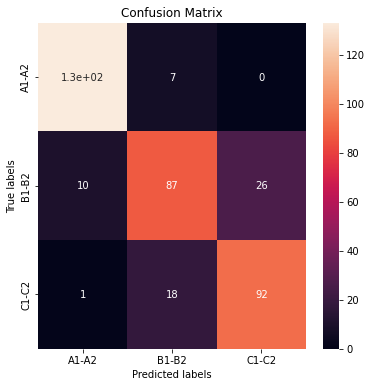

In [144]:
print_evaluations(y_test, lr_rus_predictions, "Logistic Regression predictions, on undersampled dataset")

### Naive Bayes

In [145]:
nb = MultinomialNB()

In [146]:
nb.fit(X_train_rus, y_train_rus)

MultinomialNB()

In [147]:
nb_rus_predictions = nb.predict(X_test)

In [148]:
nb.score(X_train_rus, y_train_rus)

0.9568273092369478

How does model Naive Bayes predictions, on undersampled dataset score:
The accuracy of the model is: 0.816
The precision of the model is: 0.819
The recall of the model is: 0.816
The f1-score of the model is: 0.817
[[124  15   1]
 [  8  90  25]
 [  1  19  91]]


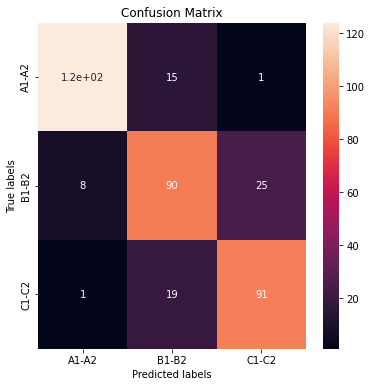

In [149]:
print_evaluations(y_test, nb_rus_predictions, "Naive Bayes predictions, on undersampled dataset")

### Random Forest

In [150]:
rf_clf = RandomForestClassifier(max_depth=30, n_estimators=200, random_state=10)

In [151]:
rf_clf.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=10)

In [152]:
rf_rus_predictions = rf_clf.predict(X_test)

How does model Random Forest predictions, on undersampled dataset score:
The accuracy of the model is: 0.805
The precision of the model is: 0.805
The recall of the model is: 0.805
The f1-score of the model is: 0.799
[[134   6   0]
 [ 14  73  36]
 [  3  14  94]]


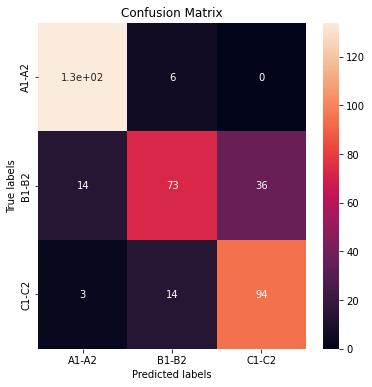

In [153]:
print_evaluations(y_test, rf_rus_predictions, "Random Forest predictions, on undersampled dataset")

### Oversampling

In [154]:
ros = RandomOverSampler({'A1-A2':420, 'B1-B2':420, 'C1-C2':420}, random_state=10) #now we are UPsampling (or OVERsampling) the frauds to 20_000
 

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

/Users/ivandominguez/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy={'A1-A2': 420, 'B1-B2': 420, 'C1-C2': 420} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [155]:
rf_clf.fit(X_train_ros, y_train_ros)
rf_ros_predictions = rf_clf.predict(X_test)

How does model Random Oversampling score:
The accuracy of the model is: 0.818
The precision of the model is: 0.817
The recall of the model is: 0.818
The f1-score of the model is: 0.812
[[136   4   0]
 [ 15  77  31]
 [  3  15  93]]


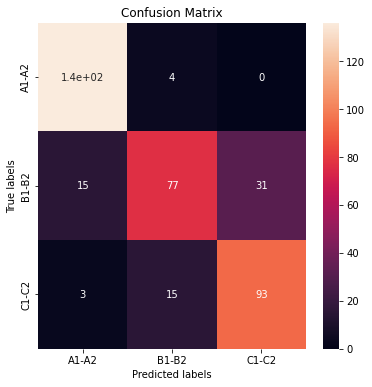

In [156]:
print_evaluations(y_test, rf_ros_predictions, 'Random Oversampling')

In [157]:
lr.fit(X_train_ros, y_train_ros)
lr_ros_predictions = lr.predict(X_test)

How does model Random Oversampling score:
The accuracy of the model is: 0.837
The precision of the model is: 0.834
The recall of the model is: 0.837
The f1-score of the model is: 0.835
[[134   6   0]
 [ 11  89  23]
 [  1  20  90]]


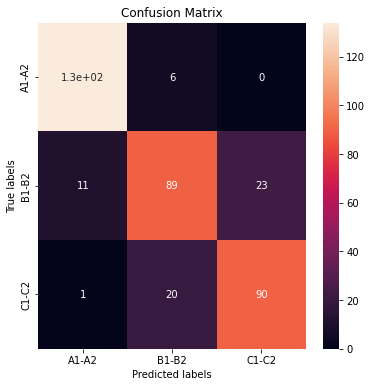

In [158]:
print_evaluations(y_test, lr_ros_predictions, 'Random Oversampling')

In [159]:
nb.fit(X_train_ros, y_train_ros)
nb_ros_predictions = nb.predict(X_test)

How does model Random Oversampling score:
The accuracy of the model is: 0.818
The precision of the model is: 0.819
The recall of the model is: 0.818
The f1-score of the model is: 0.818
[[125  14   1]
 [ 10  88  25]
 [  1  17  93]]


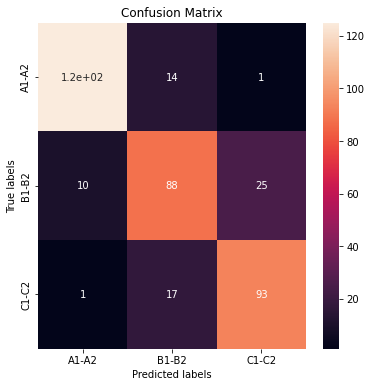

In [160]:
print_evaluations(y_test, nb_ros_predictions, 'Random Oversampling')

## SVM

In [161]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [162]:
svc = SVC()

In [163]:
#svc.fit(X_train_rus, y_train_rus)

In [164]:
#svc_rus_predictions = svc.predict(X_test)

In [165]:
#print_evaluations(y_test, svc_rus_predictions, 'Random Undersampling')

In [166]:
#svc.fit(X_train_ros, y_train_ros)

In [167]:
#svc_ros_predictions = svc.predict(X_test)

In [168]:
#print_evaluations(y_test, svc_ros_predictions, 'Random Oversampling')

## Hyperparameter tuning

### Random Forest

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
rf_opt = RandomForestClassifier()  # a unfitted model

In [171]:
hyperparam_grid = {
    'max_depth': [2, 5, 10, 20, 30], 
    'n_estimators': [5, 10, 100, 200],
    'min_samples_leaf': [1,5,10]
}

In [172]:
grid_cv = GridSearchCV(estimator=rf_opt,            # unfitted model/estimator
                       param_grid=hyperparam_grid,  # hyperparameters dict
                       cv=5,                        # number of folds, k
                       scoring='accuracy')       

In [173]:
# fit all models with all the different hyperparamters
#grid_cv.fit(X_train_rus, y_train_rus)

In [174]:
#results_df = pd.DataFrame(grid_cv.cv_results_)

In [175]:
#results_df

In [176]:
#results_df[['param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'mean_test_score',
       'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

IndentationError: unexpected indent (4082799948.py, line 2)

In [ ]:
#Examining the best set of values for the hyperparameters

#grid_cv.best_params_  

{'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 200}

In [ ]:
from sklearn.model_selection import cross_val_score
#rf_best = grid_cv.best_estimator_    # this is our best trained model

#rf_best = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=1)

#cross_acc = cross_val_score(estimator=rf_best,  # estimator: # the model you want to evaluate 
                            X=X_train_rus,           # the training input data 
                            y=y_train_rus,           # the training output data  
                            cv=5,               # number of cross validation datasets, k   
                            scoring='accuracy') # evaluation metric 

In [ ]:
#cross_acc

array([0.785     , 0.7839196 , 0.78894472, 0.80904523, 0.77386935])

In [ ]:
#cross_acc.mean()

0.7881557788944723

In [ ]:
#rf_best = grid_cv.best_estimator_

In [ ]:
#rf_best

RandomForestClassifier(max_depth=30, n_estimators=200)

In [ ]:
#rf_best.score(X_test, y_test)

0.7967914438502673

## Save the best model

In [5]:
from sklearn.pipeline import make_pipeline

def train_model(X_train, y_train):
    """Return a Logistic Regression classifier fit on a selected dataset (CORPUS) consisting of a list of strings."""
    m = make_pipeline(
        TfidfVectorizer(),
        LogisticRegression()
    )
    fitted_model = m.fit(X_train, y_train)
    return fitted_model

In [6]:
def make_predictions(X_test, fitted_model):
    """Takes a fitted Logistic Regression classifier and returns predictions (hard and soft)."""
    X_test = [X_test]
    predictions = fitted_model.predict(X_test) # "hard"-predictions
    probs = fitted_model.predict_proba(X_test) # "soft"-predictions
    return predictions, probs

In [ ]:
X_train.shape, y_train.shape

((1120, 28035), (1120,))

In [ ]:
X_train_ros.shape, y_train_ros.shape

((1260, 28035), (1260,))

In [45]:
fitted_model = train_model(CLEAN_CORPUS, LABELS)

In [46]:
fitted_model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [160]:
X_test = "Of government the properties to unfold, Would seem in me to affect speech and discourse; Since I am put to know that your own science Exceeds, in that, the lists of all advice My strength can give you: then no more remains  But that to your sufficiency as your Worth is able, And let them work. The nature of our people, Our city's institutions, and the terms For common justice, you're as pregnant in As art and practise hath enriched any That we remember. There is our commission, From which we would not have you warp. Call hither, I say, bid come before us Angelo."

In [161]:
make_predictions(X_test, fitted_model)

(array(['C1-C2'], dtype='<U5'), array([[0.28630621, 0.35542954, 0.35826425]]))

In [164]:
lr_clf = train_model(X_train = CLEAN_CORPUS,y_train = LABELS)

In [166]:
import pickle

with open("./logistic_regression.bin", "wb") as file:
        pickle.dump(lr_clf, file)

In [1]:
import pickle

def load_model():
    with open("./logistic_regression.bin", "rb") as file_in:
            clf_LR = pickle.load(file_in)
    return clf_LR

clf_LR = load_model()

In [2]:
def make_predictions(X_test, clf_LR):
    """Takes a fitted Logistic Regression classifier and returns predictions (hard and soft)."""
    X_test = [X_test]
    predictions = clf_LR.predict(X_test) # "hard"-predictions
    probs = clf_LR.predict_proba(X_test) # "soft"-predictions
    return predictions, probs

In [3]:
X_test = "I am new to the NLP game and exploring the available options. I have stumbled across both Spacy and Hugging Face Transformers as python packages that seem applicable to my use cases. However, I am having a surprisingly hard time differentiation between the two packages. I would like to hear your input on the differences between Spacy and Hugging Face and perhaps some use cases in which you would prefer on over the other."

In [4]:
make_predictions(X_test, clf_LR)

(array(['A1-A2'], dtype='<U5'), array([[0.49446967, 0.30125802, 0.20427231]]))

In [ ]:
def clean_string(text):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    tokens = tokenizer.tokenize(text_filtered)
    clean_text = " ".join(lemmatizer.lemmatize(token) for token in tokens)

    final_string = ' '.join(clean_text)

    # Vectorize
    vectorizer = CountVectorizer(stop_words=STOPWORDS)

    vectors = vectorizer.fit_transform(final_string)

    svc_ros_predictions = svc.predict(vectors)
    
    return svc_ros_predictions

In [ ]:
text = "Keith recently came back from a trip to Chicago, Illinois. This midwestern metropolis is found along the shore of Lake Michigan. During his visit, Keith spent a lot of time exploring the city to visit important landmarks and monuments. Keith loves baseball, and he made sure to take a visit to Wrigley Field. Not only did he take a tour of this spectacular stadium, but he also got to watch a Chicago Cubs game. In the stadium, Keith and the other fans cheered for the Cubs. Keith was happy that the Cubs won with a score of 5-4. Chicago has many historic places to visit. Keith found the Chicago Water Tower impressive as it is one of the few remaining landmarks to have survived the Great Chicago Fire of 1871. Keith also took a walk through Jackson Park, a great outdoor space that hosted the World’s Fair of 1892. The park is great for a leisurely stroll, and it still features some of the original architecture and replicas of monuments that were featured in the World’s Fair. During the last part of his visit, Keith managed to climb the stairs inside of the Willis Tower, a 110-story skyscraper. Despite the challenge of climbing the many flights of stairs, Keith felt that reaching the top was worth the effort. From the rooftop, Keith received a gorgeous view of the city’s skyline with Lake Michigan in the background."

In [ ]:
clean_string("Keith recently came back from a trip to Chicago, Illinois. This midwestern metropolis is found along the shore of Lake Michigan. During his visit, Keith spent a lot of time exploring the city to visit important landmarks and monuments. Keith loves baseball, and he made sure to take a visit to Wrigley Field. Not only did he take a tour of this spectacular stadium, but he also got to watch a Chicago Cubs game. In the stadium, Keith and the other fans cheered for the Cubs. Keith was happy that the Cubs won with a score of 5-4. Chicago has many historic places to visit. Keith found the Chicago Water Tower impressive as it is one of the few remaining landmarks to have survived the Great Chicago Fire of 1871. Keith also took a walk through Jackson Park, a great outdoor space that hosted the World’s Fair of 1892. The park is great for a leisurely stroll, and it still features some of the original architecture and replicas of monuments that were featured in the World’s Fair. During the last part of his visit, Keith managed to climb the stairs inside of the Willis Tower, a 110-story skyscraper. Despite the challenge of climbing the many flights of stairs, Keith felt that reaching the top was worth the effort. From the rooftop, Keith received a gorgeous view of the city’s skyline with Lake Michigan in the background.")

In [ ]:
steps = [('tf-idf', TfidfVectorizer(stop_words=STOPWORDS)),
         
          ('LR', LogisticRegression())
        ]

pipeline = Pipeline(steps)

In [ ]:
pipeline.fit(CLEAN_CORPUS, LABELS)

In [ ]:
pipeline.predict(["it is with the greatest honour that I bestow upon you the title of queen.", "I want it that way"])

In [ ]:
pipeline.predict_proba(["it is with the greatest honour that I bestow upon you the title of queen.", "I want it that way"])